#Git clone YOLOv5

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15338, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 15338 (delta 0), reused 2 (delta 0), pack-reused 15335
Receiving objects: 100% (15338/15338), 14.15 MiB | 31.57 MiB/s, done.
Resolving deltas: 100% (10524/10524), done.


#Install dependencies

In [ ]:
!pip install -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.1 MB/s eta 0:00:00


#Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import library

In [ ]:
import torch
from IPython.display import Image 
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

random.seed(108)

#Create folder held images

In [ ]:
!mkdir Nine-dash_Line


In [ ]:
cd /content/drive/MyDrive/Dataset/zai2019_hackaton_train/images/train

/content/drive/MyDrive/Dataset/zai2019_hackaton_train/images/train


(170, 246)


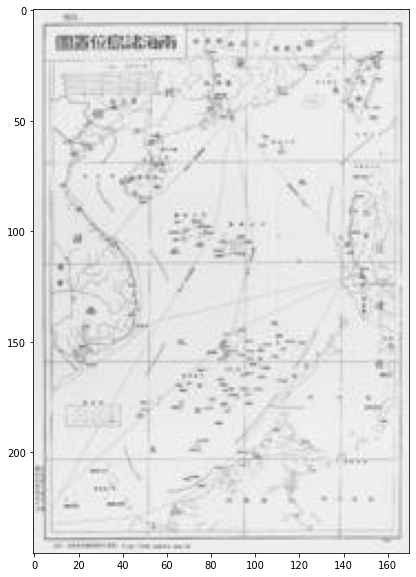

In [ ]:
img = Image.open('208.jpg')
print(img.size)

plt.rcParams["figure.figsize"] = (7, 10)
plt.imshow(img)

In [ ]:
cd /content/drive/MyDrive/Dataset/zai2019_hackaton_train/annotations

/content/drive/MyDrive/Dataset/zai2019_hackaton_train/annotations


#Create function converted COCO format to YOLO format

In [ ]:
def convert_bbox_coco2yolo(img_width, img_height, bbox):
    """
    Convert bounding box from COCO  format to YOLO format

    Parameters
    ----------
    img_width : int
        width of image
    img_height : int
        height of image
    bbox : list[int]
        bounding box annotation in COCO format: 
        [top left x position, top left y position, width, height]

    Returns
    -------
    list[float]
        bounding box annotation in YOLO format: 
        [x_center_rel, y_center_rel, width_rel, height_rel]
    """
    
    # YOLO bounding box format: [x_center, y_center, width, height]
    # (float values relative to width and height of image)
    x_tl, y_tl, w, h = bbox

    dw = 1.0 / img_width
    dh = 1.0 / img_height

    x_center = x_tl + w / 2.0
    y_center = y_tl + h / 2.0

    x = x_center * dw
    y = y_center * dh
    w = w * dw
    h = h * dh

    return [x, y, w, h]

In [ ]:
import os
import json
from tqdm import tqdm
import shutil

def make_folders(path="output"):
    if os.path.exists(path):
        shutil.rmtree(path)
    os.makedirs(path)
    return path


def convert_coco_json_to_yolo_txt(output_path, json_file):

    path = make_folders(output_path)

    with open(json_file) as f:
        json_data = json.load(f)

    # write _darknet.labels, which holds names of all classes (one class per line)
    label_file = os.path.join(output_path, "_darknet.labels")
    with open(label_file, "w") as f:
        for category in tqdm(json_data["categories"], desc="Categories"):
            category_name = category["name"]
            f.write(f"{category_name}\n")

    for image in tqdm(json_data["images"], desc="Annotation txt for each iamge"):
        img_id = image["id"]
        img_name = image["file_name"]
        img_width = image["width"]
        img_height = image["height"]

        anno_in_image = [anno for anno in json_data["annotations"] if anno["image_id"] == img_id]
        anno_txt = os.path.join(output_path, img_name.split(".")[0] + ".txt")
        with open(anno_txt, "w") as f:
            for anno in anno_in_image:
                category = anno["category_id"]
                bbox_COCO = anno["bbox"]
                x, y, w, h = convert_bbox_coco2yolo(img_width, img_height, bbox_COCO)
                f.write(f"{category} {x:.6f} {y:.6f} {w:.6f} {h:.6f}\n")

    print("Converting COCO Json to YOLO txt finished!")

In [ ]:
convert_coco_json_to_yolo_txt("/content/Nine-dash_Line/labels", "ninedash_keypoints_train.json")

Annotation txt for each iamge: 100%|██████████| 2590/2590 [00:00<00:00, 9800.59it/s]

Converting COCO Json to YOLO txt finished!


#Copy labels to google drive after converted

In [ ]:
!rsync -r --progress "/content/labels" "/content/drive/MyDrive/Dataset/zai2019_hackaton_train"

In [ ]:
cd Nine-dash_Line

/content/Nine-dash_Line


#Create Images and Annotations folder

In [ ]:
!mkdir Images

!mkdir Annotations

#Move file from google drive to colab

In [ ]:
import glob
def move(src, dst):
  for filename in glob.glob(os.path.join(src, '*.*')):
    shutil.copy(filename, dst)

move('/content/drive/MyDrive/Dataset/zai2019_hackaton_train/images/train','/content/Nine-dash_Line/Images')
move('/content/drive/MyDrive/Dataset/zai2019_hackaton_train/labels', '/content/Nine-dash_Line/Annotations')

#Check list

In [ ]:
images = [x for x in os.listdir('Images')]
annotations = [x for x in os.listdir('Annotations') if x[-3:] == "txt"]

images.sort()
annotations.sort()
annotations.remove('619.txt')
# annotations.remove('labels/_darknet.labels')

# images.remove('396.jpg')

percentile_list = pd.DataFrame(
    {'images': images,
     'annotations': annotations,
    })
percentile_list

,images,annotations
0,000.jpg,000.txt
1,001.jpg,001.txt
2,002.jpg,002.txt
3,003.jpg,003.txt
4,004.jpg,004.txt
...,...,...
2584,995.jpg,995.txt
2585,996.jpg,996.txt
2586,997.jpg,997.txt
2587,998.jpg,998.txt


In [ ]:
print(len(images))
print(len(annotations))

2589
2589


In [ ]:
annotations_ = [x for x in os.listdir('labels') if x[-3:] == "txt"]

In [ ]:
s = set(annotations_)
if '_darknet.labels' in s:
  print(True)
else:
  print(False)

False


#Split num from filename


In [ ]:
import re

def split_filename(path, num):
  img = []
  held_str = []
  for x in os.listdir(path):
    img.append(x)
  
  delimiters = "."
  regex_pattern = '|'.join(map(re.escape, delimiters))
  for im in img:
    held_str.append(re.split(regex_pattern, im))
  
  return [held_str[i][0] for i in range(0,num)]

In [ ]:
import collections
def compareList(l1,l2):
   if(collections.Counter(l1)==collections.Counter(l2)):
      return "Equal"
   else:
      return "Non equal"

In [ ]:
array_annotation = split_filename('labels', 2590)
array_annotation.sort()
array_annotation.remove('619')
array_annotation.remove('_darknet')

array_image = split_filename('Images', 2589)
array_image.sort()
array_image.remove('396')

annotations_ = [x for x in os.listdir('labels') if x[-3:] == "txt"]
annotations_.sort()

print(array_annotation)
print(array_image)
print(len(array_annotation))
print(len(array_image))

# for (i, j) in zip(array_image, array_annotation):
#   if i != j:
#     print(j)

['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '096', '097', '098', '099', '100', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '101', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '102', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '103', '1030', '1031', '1032', '1033', '1034'

#Train test split

In [ ]:
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [ ]:
print(len(train_images))
print(len(test_images))
print(len(val_images))
print(len(train_annotations))
print(len(test_annotations))
print(len(val_annotations))

2071
259
259
2071
259
259


In [ ]:
print(train_images[1000])
print(train_annotations[1000])

127.jpg
127.txt


In [ ]:
!pwd

/content/Nine-dash_Line


In [ ]:
!mkdir Images/train Images/val Images/test Annotations/train Annotations/val Annotations/test

In [ ]:
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

In [ ]:
cd ../Images

/content/Nine-dash_Line/Images


In [ ]:
!pwd

/content/Nine-dash_Line/Annotations


In [ ]:
move_files_to_folder(train_images, 'train/')
move_files_to_folder(val_images, 'val/')
move_files_to_folder(test_images, 'test/')
# move_files_to_folder(train_annotations, 'train/')
# move_files_to_folder(val_annotations, 'val/')
# move_files_to_folder(test_annotations, 'test/')

(1513, 1990, 3)


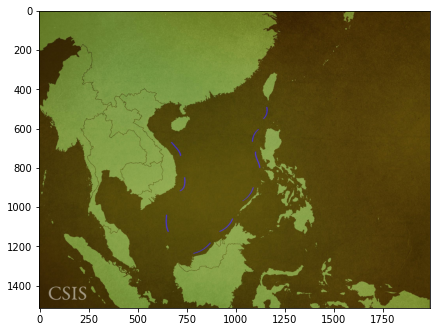

In [ ]:
import cv2
img = cv2.imread('009.jpg')

# Height, width, channel
print(img.shape)

plt.imshow(img)

In [ ]:
cd ..

/content/Nine-dash_Line


In [ ]:
!mv Images images
!mv Annotations labels

In [ ]:
cd ../../yolov5

/content/yolov5


In [ ]:
!rm nine_dash_line.yaml
!echo 'train: /content/Nine-dash_Line/images/train' >> nine_dash_line.yaml
!echo 'val: /content/Nine-dash_Line/images/val' >> nine_dash_line.yaml
!echo 'test: /content/Nine-dash_Line/images/test' >>nine_dash_line.yaml
!echo 'nc: 2' >> nine_dash_line.yaml
!echo 'name: ["noninedash","ninedash"]' >> nine_dash_line.yaml

In [ ]:
!pwd

/content/yolov5


#Train

In [ ]:
!python train.py --img 420 --cfg yolov5s.yaml --hyp hyp.scratch-high.yaml --batch 32 --epochs 100 --data nine_dash_line.yaml --weights yolov5s.pt --workers 24 --name yolo_ninedash_det

#Move results to google drive

In [ ]:
!rsync -r --progress "/content/yolov5/runs/train/yolo_ninedash_det" "/content/drive/MyDrive/Dataset/zai2019_hackaton_train" 

sending incremental file list
yolo_ninedash_det/
yolo_ninedash_det/F1_curve.png
        104,048 100%   67.98MB/s    0:00:00 (xfr#1, to-chk=23/25)
yolo_ninedash_det/PR_curve.png
         86,288 100%   10.29MB/s    0:00:00 (xfr#2, to-chk=22/25)
yolo_ninedash_det/P_curve.png
         99,435 100%    6.32MB/s    0:00:00 (xfr#3, to-chk=21/25)
yolo_ninedash_det/R_curve.png
        102,309 100%    4.43MB/s    0:00:00 (xfr#4, to-chk=20/25)
yolo_ninedash_det/confusion_matrix.png
         93,838 100%    3.31MB/s    0:00:00 (xfr#5, to-chk=19/25)
yolo_ninedash_det/events.out.tfevents.1679303398.9b801e83a284.5918.0
        727,293 100%   14.76MB/s    0:00:00 (xfr#6, to-chk=18/25)
yolo_ninedash_det/hyp.yaml
            372 100%    7.57kB/s    0:00:00 (xfr#7, to-chk=17/25)
yolo_ninedash_det/labels.jpg
        193,861 100%    2.43MB/s    0:00:00 (xfr#8, to-chk=16/25)
yolo_ninedash_det/labels_correlogram.jpg
        203,739 100%    2.40MB/s    0:00:00 (xfr#9, to-chk=15/25)
yolo_ninedash_det/opt.yaml
   

In [ ]:
!pip install torch torchvision onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


In [ ]:
!pip install git+https://github.com/ultralytics/yolov5.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ultralytics/yolov5.git to /tmp/pip-req-build-z46hks7f
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/yolov5.git /tmp/pip-req-build-z46hks7f
  Resolved https://github.com/ultralytics/yolov5.git to commit b96f35ce75effc96f1a20efddd836fa17501b4f5
ERROR: git+https://github.com/ultralytics/yolov5.git does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
import torch
from models.yolo import Model

# Load the trained PyTorch model
checkpoint = torch.load('/content/drive/MyDrive/Dataset/zai2019_hackaton_train/yolo_ninedash_det/weights/last.pt', map_location='cpu')
model = Model('models/yolov5s.yaml',  # number of classes
               pretrained=False)  # don't load the pre-trained weights
model.load_state_dict(checkpoint['model'].state_dict())  # load the state dictionary
model.eval()  # set the model to evaluation mode


TypeError: ignored

In [ ]:
!git clone https://github.com/DanielChuDC/yolov5-fastapi

Cloning into 'yolov5-fastapi'...
remote: Enumerating objects: 105, done.
remote: Total 105 (delta 0), reused 0 (delta 0), pack-reused 105
Receiving objects: 100% (105/105), 82.82 MiB | 37.13 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [ ]:
!uvicorn main:app --reload --host 0.0.0.0 --port 8000

/bin/bash: uvicorn: command not found
